RMSE (Regressão Polinomial Múltipla): 4162.430105259421


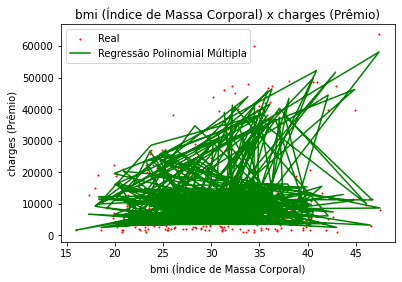

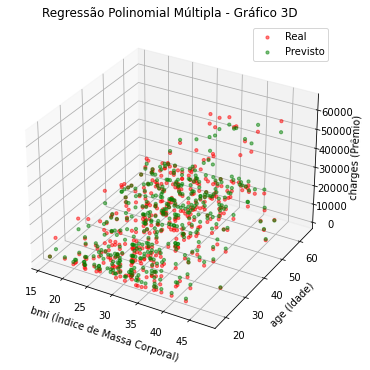

In [15]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D


# Carrega os dados
df = pd.read_csv('diabetes.csv')

# Converte "sim" para 1 e "não" para 0 na coluna "smoker"
# Temos que tratar os dados da coluna smoker pois possui dados com sim ou não
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# Separação dos dados em treino e teste
XTrain, XTest, yTrain, yTest = train_test_split(df[["bmi", "age", "smoker"]], df["charges"], test_size=0.3)

# Cria as características polinomiais
poly = PolynomialFeatures(degree=2)
XTrain_poly = poly.fit_transform(XTrain)
XTest_poly = poly.transform(XTest)

# Normalização usando Standard Scaling apenas para variáveis contínuas "bmi e age"
# Não é necessário normalizar a variável smoker porque já está em binário 0 e 1
scaler = StandardScaler()
XTrain_poly[:, 1:] = scaler.fit_transform(XTrain_poly[:, 1:])  # Normaliza apenas as colunas de variáveis contínuas
XTest_poly[:, 1:] = scaler.transform(XTest_poly[:, 1:])  # Usa o mesmo scaler para transformar os dados de teste

# Regressão polinomial múltipla
regressor_poly = LinearRegression()
regressor_poly.fit(XTrain_poly, yTrain)

# Predict usando regressão polinomial múltipla
yPred_poly = regressor_poly.predict(XTest_poly)

# Calcula o RMSE para a regressão polinomial múltipla
rmse_poly = np.sqrt(mean_squared_error(yTest, yPred_poly))

print(f"RMSE (Regressão Polinomial Múltipla): {rmse_poly}")

# Visualização (considerando apenas uma variável independente para o gráfico)
plt.scatter(XTest["bmi"], yTest, color='red', s=1, label='Real')
plt.plot(XTest["bmi"], yPred_poly, color='green', label='Regressão Polinomial Múltipla')
plt.title("bmi (Índice de Massa Corporal) x charges (Prêmio)")
plt.xlabel("bmi (Índice de Massa Corporal)")
plt.ylabel("charges (Prêmio)")
plt.legend()
plt.show()

# Visualização 3D 
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot com tamanho e cores ajustados
ax.scatter(XTest["bmi"], XTest["age"], yTest, color='red', label='Real', s=10, alpha=0.5)
ax.scatter(XTest["bmi"], XTest["age"], yPred_poly, color='green', label='Previsto', s=10, alpha=0.5)

# Configurações do gráfico
ax.set_xlabel("bmi (Índice de Massa Corporal)")
ax.set_ylabel("age (Idade)")
ax.set_zlabel("charges (Prêmio)")
ax.set_title("Regressão Polinomial Múltipla - Gráfico 3D")

# Adiciona uma grade
ax.grid(True, linestyle='--', alpha=0.5)

# Adiciona uma legenda
ax.legend()

plt.show()